In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN,AgglomerativeClustering
import pandas as pd
# from jarvis_march import Jarvis_march
# from math import sqrt
import cv2

In [3]:
def read_obj(in_path):
    vertices = []
    faces = []

    f = open(in_path)
    for line in f.readlines():
        tmp = line.strip().split(' ')
        if tmp[0]=="v":
            tmp = list(map(float, tmp[1:]))
            vertices.append(tmp)
        elif tmp[0] =='f': 
            tmp = list(map(int, tmp[1:]))
            faces.append(tmp)
        else:
            continue
    f.close

    if not len(faces) or not len(vertices):
        return None, None

    return vertices, faces

In [4]:
def output_point_df(vt, pos):
    vt_output = []
    df_vt = pd.DataFrame(vt)
    count = 0
    x,y = 0,0
    if pos == 'x':
        x,y = 1,2
    elif pos == 'y':
        x,y = 0,1
    else:
        x,y = 0,2 
    slice_n = 5
    slice = len(vt)//slice_n
    # for r in range(0,len(vt)-slice,slice):
    #     img_gray_c = img_gray.copy()
    #     vt_tmp = []
    #     for j in range(r, r + slice):
    #         img_gray_c[vt[j][x]][vt[j][y]] = 255
    #         cv2.imwrite(f'img_{pos}_{count}.jpg',img_gray_c)
    #     count+=1
    b = 0
    for r in range(slice_n):
        vt_output.append((df_vt.iloc[b:slice + b,[x,y]]).rename(columns={x:0,y:1}))
        b += slice
    return vt_output

In [33]:
def output_point(vt, pos):
    vt_output = []
    count = 0
    x,y = 0,0
    if pos == 'x':
        x,y = 1,2
    elif pos == 'y':
        x,y = 0,1
    else:
        x,y = 0,2 
    slice_n = 5
    slice = len(vt)//slice_n
    b = 0
    for r in range(slice_n):
        vt_tmp = []
        for r in range(b,b+slice):
            vt_tmp.append([vt[r][x],vt[r][y]])
        vt_output.append(vt_tmp)
        b += slice
    return vt_output

In [6]:
def draw_point(vt,pos,img_gray,n):
    
    for v in vt:
        img_gray[v[0]][v[1]] = 255
        cv2.imwrite(f'img_{pos}_{n}.jpg',img_gray)

In [8]:
def compare_x(a):
    return (a[0])
def compare_y(a):
    return (a[2])
def compare_z(a):
    return (a[1])

In [9]:
vt,_=read_obj('014200.obj')

In [10]:
vt = np.array(vt)
vt = vt * 225
vt = vt + 113
vt = np.int64(vt)

In [31]:
vt_x = sorted(vt,key=compare_x)
vt_y = sorted(vt,key=compare_y)
vt_z = sorted(vt,key=compare_z)

In [12]:
img = cv2.imread('black.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [161]:
df_vt_x = output_point_df(vt_x,'x')
df_vt_y = output_point_df(vt_y,'y')
df_vt_z = output_point_df(vt_z,'z')

In [34]:
c_vt_x = output_point(vt_x,'x')
c_vt_y = output_point(vt_y,'y')
c_vt_z = output_point(vt_z,'z')

In [160]:
clustering=AgglomerativeClustering(n_clusters=6,affinity='euclidean',linkage='ward')

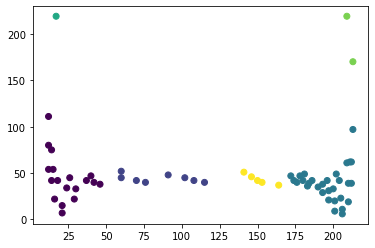

In [168]:
plt.scatter(df_vt_y[8][0],df_vt_y[8][1],c=clustering.fit_predict(df_vt_y[8]))

In [38]:
len(c_vt_x[0])

128

### 或许先处理outlier的点？

### Javis_march 不行，试做 alpha shape

In [41]:
for r in range(5):
    draw_point(c_vt_x[r],'x_c',img_gray.copy(),r)